In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cr_loan = pd.read_csv("C:\\Users\\ismail\\Downloads\Data\\Loan payments data.csv")

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ismail\AppData\Local\Temp\ipykernel_29908\3881037347.py:5: SyntaxWarning: invalid escape sequence '\D'
  cr_loan = pd.read_csv("C:\\Users\\ismail\\Downloads\Data\\Loan payments data.csv")


In [5]:
# Step 1: Understanding the Data Structure

# Check the structure of the data
print(cr_loan.dtypes)

# Check the first five rows of the data
print(cr_loan.head())



Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object
       Loan_ID loan_status  Principal  terms effective_date   due_date  \
0  xqd20166231     PAIDOFF       1000     30       9/8/2016  10/7/2016   
1  xqd20168902     PAIDOFF       1000     30       9/8/2016  10/7/2016   
2  xqd20160003     PAIDOFF       1000     30       9/8/2016  10/7/2016   
3  xqd20160004     PAIDOFF       1000     15       9/8/2016  9/22/2016   
4  xqd20160005     PAIDOFF       1000     30       9/9/2016  10/8/2016   

     paid_off_time  past_due_days  age             education  Gender  
0  9/14/2016 19:31            NaN   45  High School or Below    male  
1   10/7/2016 9:00            NaN   50              Bechalor  female  
2  9/25/2016 16:58            NaN   33    

In [10]:
print(cr_loan.columns)


Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')


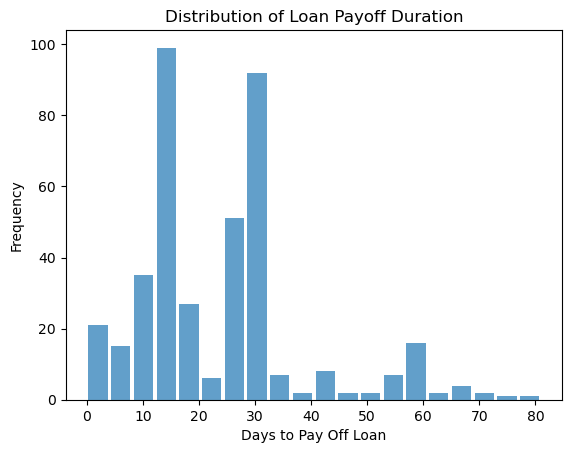

In [14]:
# Step 2: Loan Amount Distribution.


# Convert to datetime
cr_loan['effective_date'] = pd.to_datetime(cr_loan['effective_date'])
cr_loan['paid_off_time'] = pd.to_datetime(cr_loan['paid_off_time'])

# Create a new column: Days to pay off
cr_loan['days_to_pay'] = (cr_loan['paid_off_time'] - cr_loan['effective_date']).dt.days

# Plot the distribution
plt.hist(cr_loan['days_to_pay'], bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel("Days to Pay Off Loan")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Payoff Duration")
plt.show()




In [ ]:
# Step 3: Relationship Between Income and Age

plt.scatter(cr_loan['person_income'], cr_loan['person_age'], c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Person Age')
plt.show()


In [ ]:
# Step 4: Loan Intent vs Loan Status.

print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins=True))


In [ ]:
# Step 5: Home Ownership, Loan Grade & Status.

print(pd.crosstab(cr_loan['person_home_ownership'], [cr_loan['loan_status'], cr_loan['loan_grade']]))


In [ ]:
# Step 6: Home Ownership, Loan Status & Loan Percent Income (Average)

print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
                  values=cr_loan['loan_percent_income'], aggfunc='mean'))


In [ ]:
# Step 7: Boxplot – Impact of Loan Status on Income Utilization.

cr_loan.boxplot(column=['loan_percent_income'], by='loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()


In [ ]:
# Step 8: Max Employment Length by Home Ownership & Loan Status.

print(pd.crosstab(cr_loan['loan_status'], cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))


In [ ]:
# Step 9: Identify & Remove Employment Outliers (>60 months).

indices = cr_loan[cr_loan['person_emp_length'] > 60].index
cr_loan_new = cr_loan.drop(indices)


In [ ]:
# Step 10: Min & Max Employment Length (Updated Dataset)

print(pd.crosstab(cr_loan_new['loan_status'], cr_loan_new['person_home_ownership'],
                  values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))


In [ ]:
# Step 11: Scatter Plot – Age vs Loan Amount

plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()


In [ ]:
# Step 12: Age vs Interest Rate with Risk Coloring (Loan Status).

colors = ["blue", "red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c=cr_loan_new['loan_status'],
            cmap=matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()


In [ ]:
# Step 13: Handling Missing Employment Data.

print(cr_loan.columns[cr_loan.isnull().any()])
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()
